<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-BlackPuma075/blob/main/Sep29_30/Monte_Carlo_Markov_Chain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [2]:
file = '/content/drive/MyDrive/Machine_Learning/olympic100m_men.txt'
data = np.loadtxt(file, delimiter = ',').T

In [3]:
x_n = data[0]
y = data[1]
x = (x_n-1840)/4

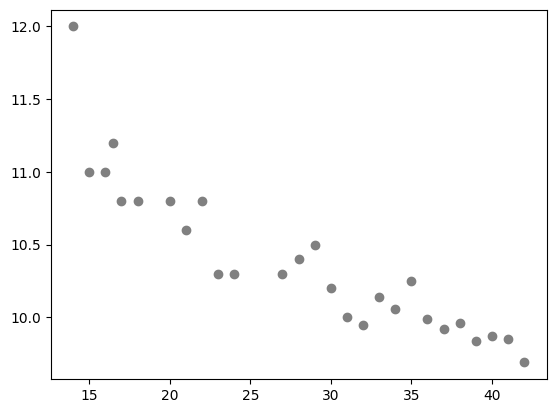

In [4]:
plt.scatter(x,y, color = 'gray')

In [5]:
def w_mat(x,y):
  t = y
  X = np.vstack([np.ones_like(x),x]).T
  X_tX = np.matmul(X.T,X)
  invX_tX = np.linalg.inv(X_tX)
  X_t = np.matmul(X.T, t)
  w = np.matmul(invX_tX, X_t)
  return w

In [6]:
x_test = np.linspace(min(x), max(x), 27)
w_test = w_mat(x,y)
print(w_test)
w_test.shape

[11.88762619 -0.05332354]


(2,)

In [7]:
x_test = np.linspace(min(x), max(x), 27)
y_p = w_test[1]+w_test[0]*x_test

In [18]:
def lnLikelihood(theta, x, y):
  L = 0
  for i in range(len(x)):
    L += (y[i]-theta[0]-theta[1]*x[i])**2
  return np.log(L)

In [9]:
lnPr = np.zeros(2)
lnPr[0] = np.log(1)
lnPr[1] = np.log(0)
lnPr

<ipython-input-9-2a8f716878b5>:3: RuntimeWarning: divide by zero encountered in log
  lnPr[1] = np.log(0)


array([  0., -inf])

In [26]:
def lnPrior(theta, lim):
  a, b = theta
  if (lim[0] < a < lim[1]) and (lim[2] < b < lim[3]):
    return 0.0
  return -np.inf

In [28]:
theta_ini = w_test
theta_ini

[10, -0.1]

In [46]:
logL = lnLikelihood(theta_ini, x, y)
logL

5.64244557839921

In [34]:
lnppp = lnPrior(w_test, lim)
lnppp

-inf

In [47]:
def montecarlo(x, y, s1, s2, lim, repeticiones, w):
  chain = [w_test]
  theta_ini = w_test

  for i in range(repeticiones):
    w0 = np.random.normal(theta_ini[0], s1)
    w1 = np.random.normal(theta_ini[1], s2)
    theta_prop = [w0, w1]

    post_nuevo = lnLikelihood(theta_prop, x, y)
    post_viejo = lnLikelihood(theta_ini, x, y)
    prior_nuevo = lnPrior(theta_prop, lim)
    prior_viejo = lnPrior(theta_ini, lim)

    post_nuevo = post_nuevo + prior_nuevo
    post_viejo = post_viejo + prior_viejo

    if (post_nuevo > post_viejo):
      chain.append(theta_prop)
      theta_ini = theta_prop
    else:
      ptest = np.random.uniform(0, 1)
      pnuevo = post_nuevo/post_viejo
      if (pnuevo > ptest):
        chain.append(theta_prop)
        theta_ini = theta_prop
      else:
        chain.append(theta_ini)
  chain = np.array(chain)
  return chain

In [52]:
lim = [-1, 1, 20, 60]
s1 = 0.1
s2 = 0.2
w_test = [10, -.1]
N = 10

In [51]:
valores = montecarlo(x, y, s1, s2, lim, N, w_test)

<ipython-input-47-1e0eaa83fde0>:23: RuntimeWarning: invalid value encountered in double_scalars
  pnuevo = post_nuevo/post_viejo


In [42]:
valores.shape

(101, 2)

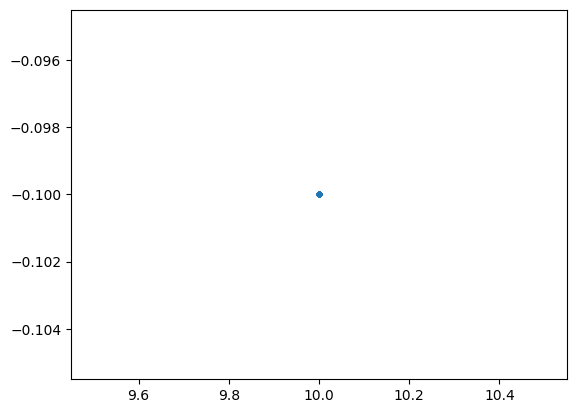

In [43]:
plt.scatter(valores[:,0], valores[:,1], s = None, marker='.')